## **DBSCAN (Core)**

En esta actividad, implementarás el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes atípicos en el dataset «Wholesale Customers Data» disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos atípicos (outliers), lo que es útil en escenarios donde los datos no forman clusters esféricos como en el caso de K-means.

**Enlace al dataset:** https://www.kaggle.com/binovi/wholesale-customers-data-set



### **Objetivo:**

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes atípicos en el dataset. El enfoque está en comprender cómo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.



### **Instrucciones:**

#### **1. Carga de datos:**
- Descarga y carga el dataset de Kaggle. Realiza una exploración inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
- El dataset contiene información sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categorías de productos.

#### **2. Exploración y preprocesamiento de datos:**
- Realiza un análisis exploratorio de los datos, incluyendo un resumen estadístico de las variables. Es importante entender la distribución de los datos antes de aplicar el modelo de DBSCAN.
- Asegúrate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.
- Considera la posibilidad de eliminar o tratar valores atípicos que puedan afectar el rendimiento del algoritmo.

#### **3. Aplicación de DBSCAN:**
- Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperparámetros importantes: epsilon (distancia máxima para considerar dos puntos como vecinos) y min_samples (número mínimo de puntos requeridos para formar un cluster).
- Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza técnicas visuales como gráficos de dispersión para evaluar los resultados obtenidos.
- Determina cuáles son los outliers identificados por DBSCAN y visualiza cómo se distribuyen en relación con los clusters formados.

#### **4. Visualización de clusters y outliers:**
- Visualiza los clusters formados por DBSCAN en gráficos de dispersión. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.
- Discute la estructura de los clusters encontrados. ¿Hay alguna correlación entre las variables y los clusters? ¿Cómo se distribuyen los outliers en comparación con los datos agrupados?

#### **5. Interpretación de resultados:**
- Evalúa la calidad del agrupamiento. DBSCAN no requiere que se especifique el número de clusters, lo que es una ventaja cuando no se conoce esta información de antemano.
- Discute la naturaleza de los outliers detectados. ¿Son clientes únicos con comportamientos inusuales? ¿Podrían estos clientes representar oportunidades comerciales o riesgos?



### **Análisis de Resultados:**

- En esta sección, realiza un análisis detallado de los clusters formados y de los outliers. Utiliza métricas como el «silhouette score» para evaluar la calidad del agrupamiento, aunque es importante recordar que DBSCAN no siempre forma clusters compactos, por lo que estas métricas deben interpretarse con cuidado.

- Genera un reporte que explique los valores de epsilon y min_samples elegidos, y justifica por qué esos valores fueron adecuados para este dataset. Analiza si los clusters formados tienen sentido desde una perspectiva comercial o de comportamiento del cliente.



### **Conclusión:**

- Esta actividad tiene como objetivo principal el uso de DBSCAN para encontrar agrupamientos en datos que pueden no formar clusters bien definidos. También busca desarrollar habilidades para la detección de outliers y para el ajuste de los parámetros de un modelo no supervisado.

### **Librerias y Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "Wholesale customers data.csv")
data = pd.read_csv(dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\binovi\wholesale-customers-data-set\versions\1


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {data.shape[1]}, Ejemplos: {data.shape[0]}")
print("Primeras 5 filas del dataset:")
data.head()

Dimensiones del dataset:
Features: 8, Ejemplos: 440
Primeras 5 filas del dataset:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


#### **Consistencia en valores**

In [6]:
# Visualizar los valores unicos en cada columna en modo lista
for col in data.columns:
    print(f"Valores unicos en la columna '{col}': {data[col].unique()}")

Valores unicos en la columna 'Channel': [2 1]
Valores unicos en la columna 'Region': [3 1 2]
Valores unicos en la columna 'Fresh': [ 12669   7057   6353  13265  22615   9413  12126   7579   5963   6006
   3366  13146  31714  21217  24653  10253   1020   5876  18601   7780
  17546   5567  31276  26373  22647  16165   9898  14276   4113  43088
  18815   2612  21632  29729   1502    688  29955  15168   4591  56159
  24025  19176  10850    630   9670   5181   3103  44466  11519   4967
   6269   3347  40721    491  27329   5264   4098   5417  13779   6137
   8590  35942   7823   9396   4760     85      9  19913   2446   8352
  16705  18291   4420  19899   8190  20398    717  12205  10766   1640
   7005    219  10362  20874  11867  16117  22925  43265   7864  24904
  11405  12754   9198  11314   5626      3     23    403    503   9658
  11594   1420   2932  56082  14100  15587   1454   8797   1531   1406
  11818  12579  19046  14438  18044  11134  11173   6990  20049   8258
  17160   4020  1

#### **Analisis de duplicados**

In [7]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 0


#### **Analisis de distribucion de las variables**

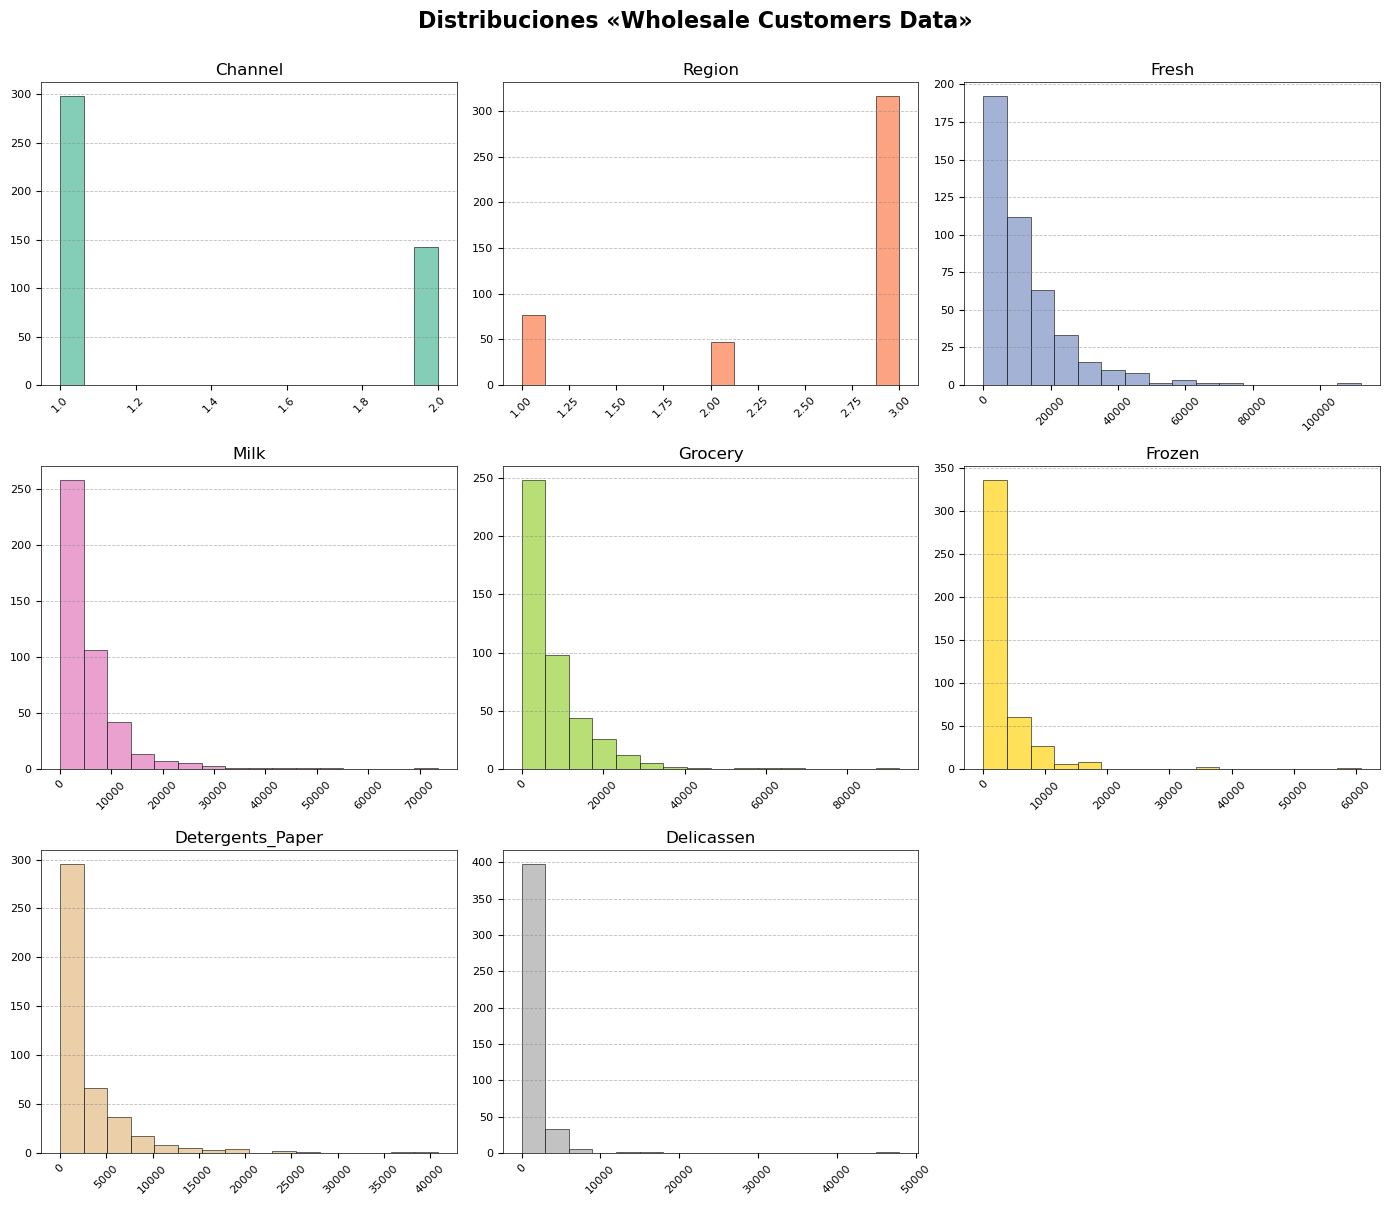

In [8]:
distributionplot = utils.plot_distributions(data,
                        figsize=(14, 12),
                        nrows=3,
                        ncols=3,
                        bins='rice',
                        color_palette='Set2',
                        title='Distribuciones «Wholesale Customers Data»')
plt.show()

#### **Grafico de Pares**

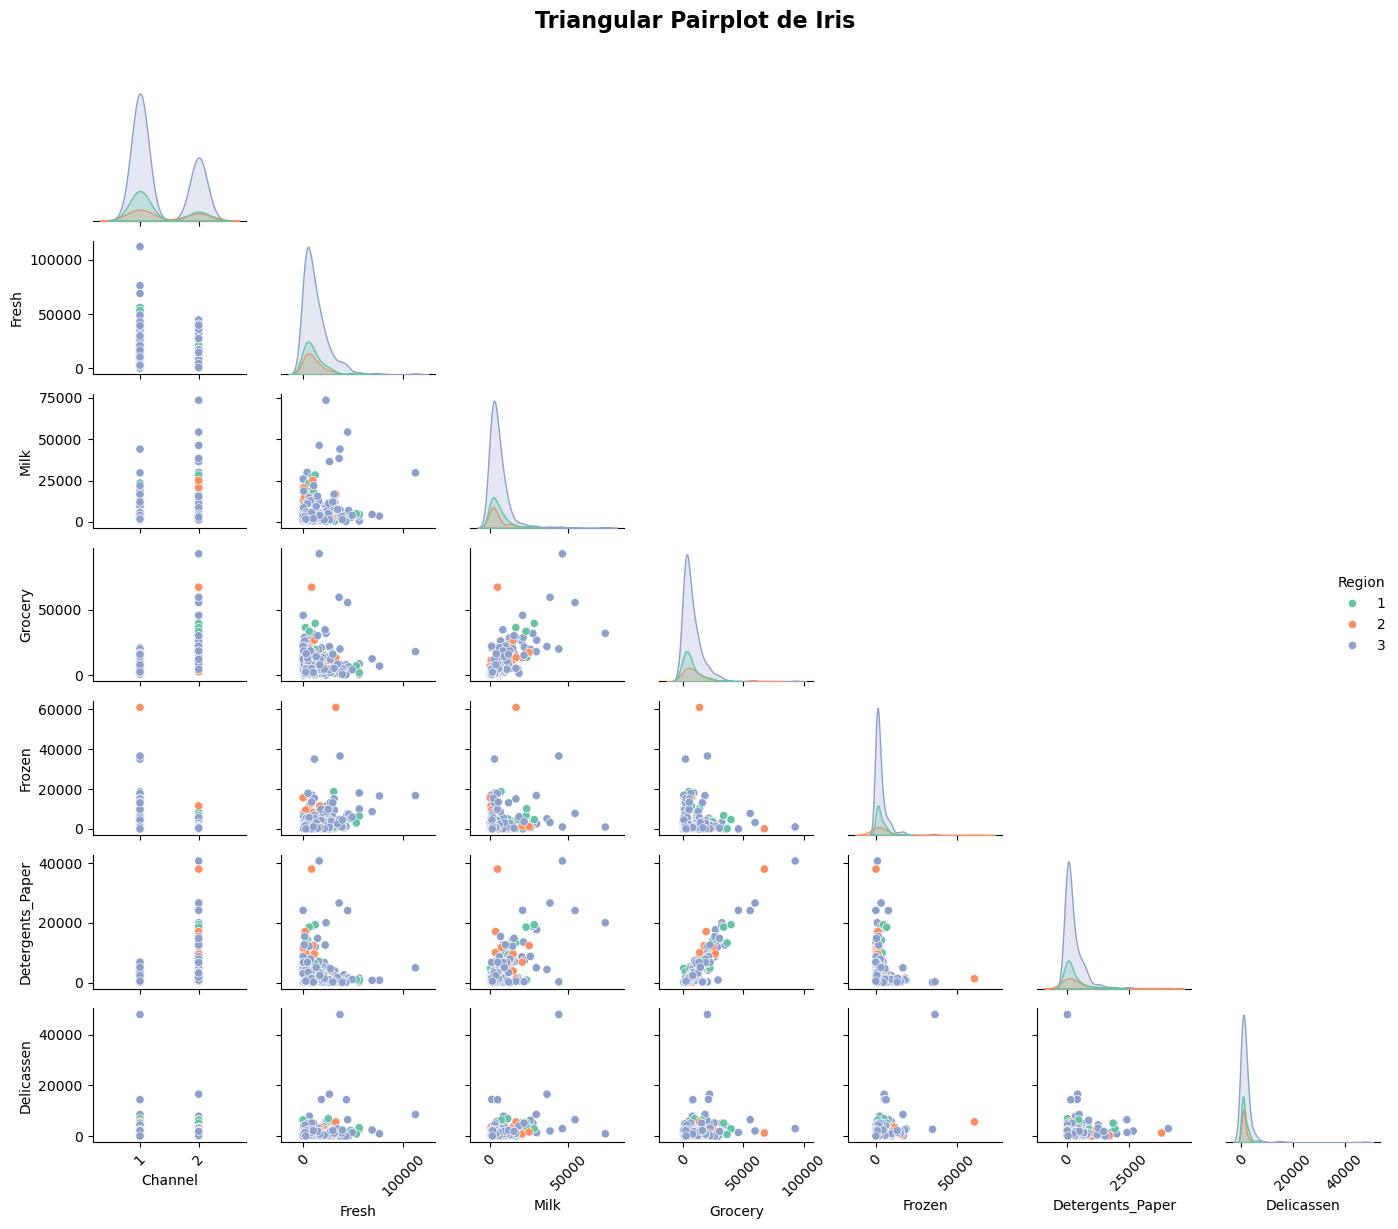

In [9]:
# Generar el pairplot con personalización de ticks
triangular_plot = utils.triangular_pairplot(
    data=data,
    hue="Region",           # Columna para colorear
    title="Triangular Pairplot de Iris", 
    palette="Set2",       # Paleta de colores
    kind="scatter",          # Tipo de gráfico (scatter o reg)
    diag_kind="kde",         # Tipo en la diagonal (kde o hist)
    height=2.8,              # Tamaño de cada gráfico
    aspect=1.2,              # Relación de aspecto
    corner=True,             # Solo triángulo inferior
    figsize=(14, 12),        # Tamaño del gráfico general
    xtick_rotation=45,       # Rotación de etiquetas en el eje x
    ytick_rotation=0,        # Rotación de etiquetas en el eje y
    tick_labelsize=5,       # Tamaño de las etiquetas
)

# Mostrar gráfico
plt.show()


#### **Analisis de Outliers**

In [10]:
data_numeric = data[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

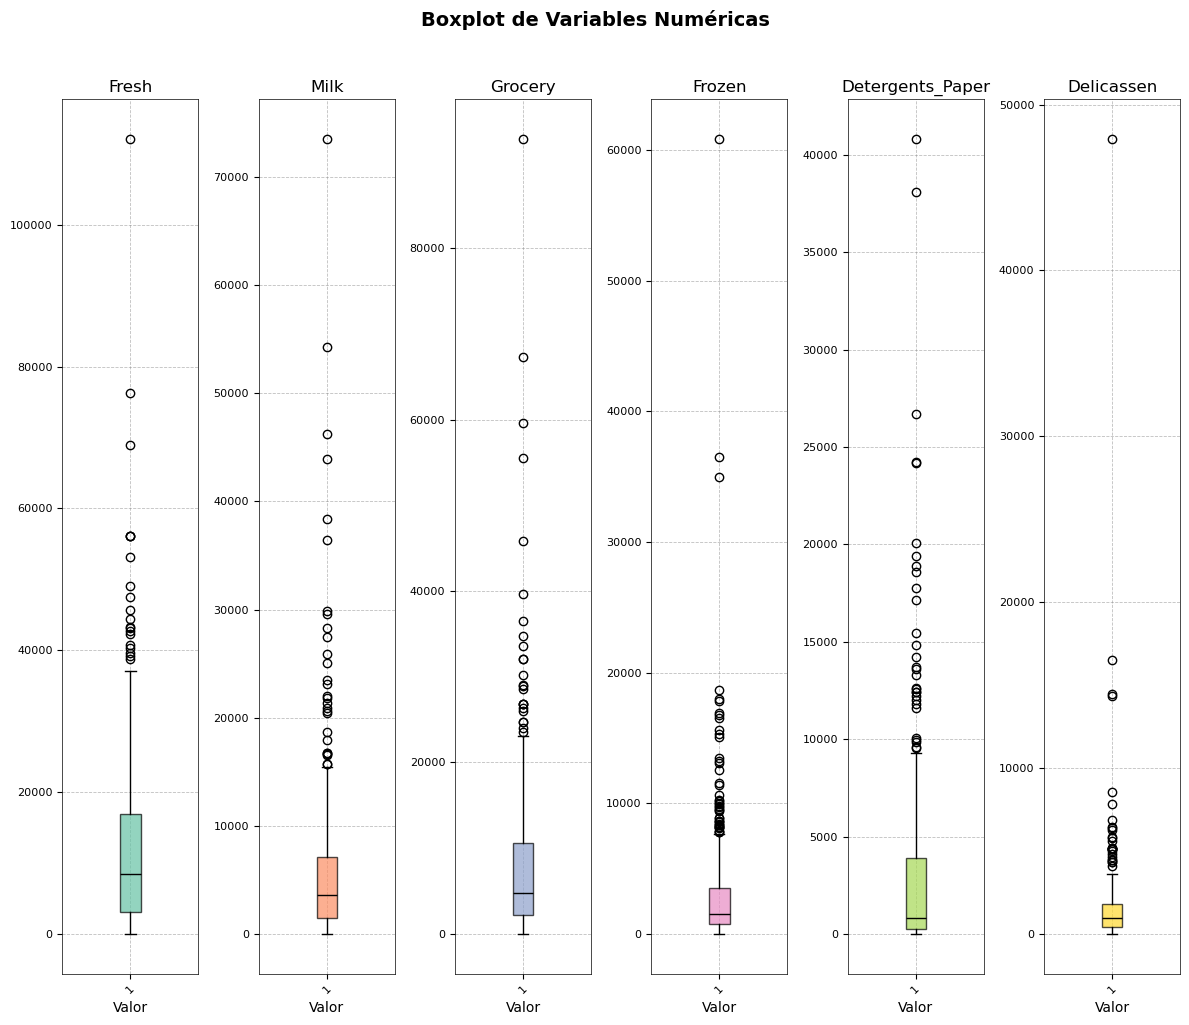

In [11]:
# Con personalización total
boxplots = utils.plot_boxplots(data_numeric, 
                    nrows=1,  # Forzar 1 fila 
                    ncols=6,  # Forzar 6 columnas
                    figsize=(12,10),  # Tamaño personalizado
                    color_palette='Set2',  # Paleta diferente
                    grid=True,  # Mostrar cuadrícula
                    title='Boxplot de Variables Numéricas',  # Título personalizado
                    median_color='black',  # Color de línea de mediana
                    box_alpha=0.7)  # Transparencia personalizada
plt.show()


In [12]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in data_numeric:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Fresh,20.0,4.545455,3.0,37036.0
Milk,28.0,6.363636,55.0,15488.0
Grocery,24.0,5.454545,3.0,23127.0
Frozen,43.0,9.772727,25.0,7683.0
Detergents_Paper,30.0,6.818182,3.0,9265.0
Delicassen,27.0,6.136364,3.0,3637.0


#### **Estadisticas Descriptivas**

In [13]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}

# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in data:  # Seleccionar solo columnas numéricas
    datos_columna = pd.to_numeric(data[columna], errors='coerce')  # Convertir valores no numéricos a NaN
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas

# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]

# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)

# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df



Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Channel,440.0,1.32,1.0,0.47,1.0,2.0,1.00,2.00
Region,440.0,2.54,3.0,0.77,1.0,3.0,2.00,3.00
Fresh,440.0,12000.30,8504.0,12647.33,3.0,112151.0,3127.75,16933.75
Milk,440.0,5796.27,3627.0,7380.38,55.0,73498.0,1533.00,7190.25
Grocery,440.0,7951.28,4755.5,9503.16,3.0,92780.0,2153.00,10655.75
Frozen,440.0,3071.93,1526.0,4854.67,25.0,60869.0,742.25,3554.25
Detergents_Paper,440.0,2881.49,816.5,4767.85,3.0,40827.0,256.75,3922.00
Delicassen,440.0,1524.87,965.5,2820.11,3.0,47943.0,408.25,1820.25


#### **Correlaciones**

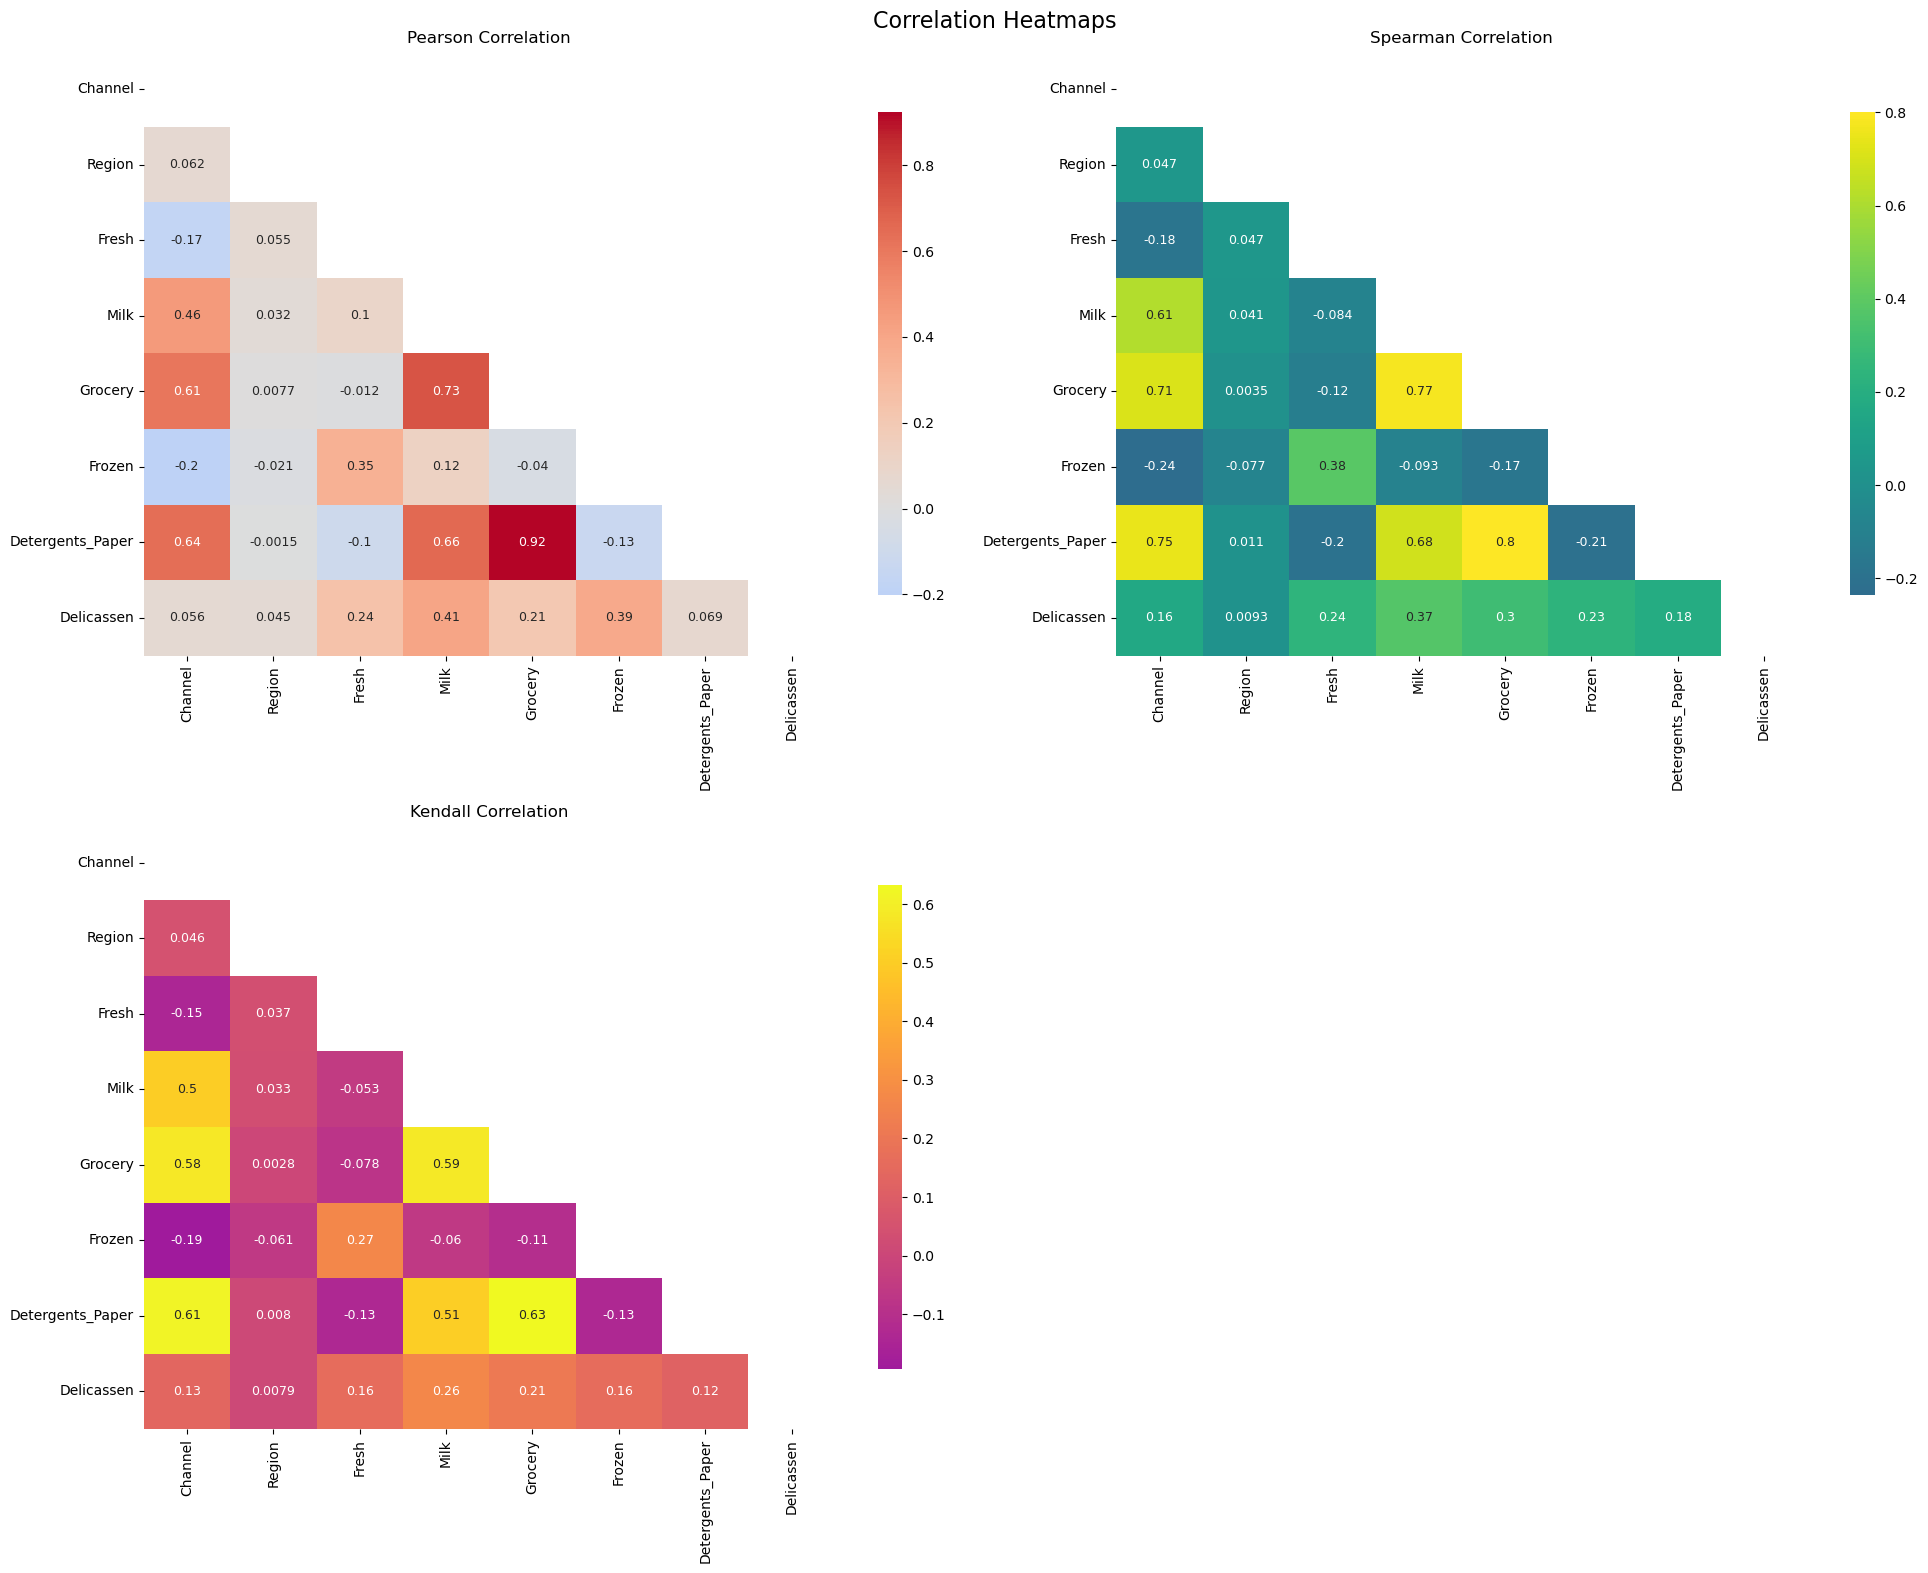

In [14]:
pearson_corr = data.corr(method='pearson')
spearman_corr = data.corr(method='spearman')
kendall_corr = data.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(20, 16),
    annot_size=9
)

Text(0, 0.5, 'Features')

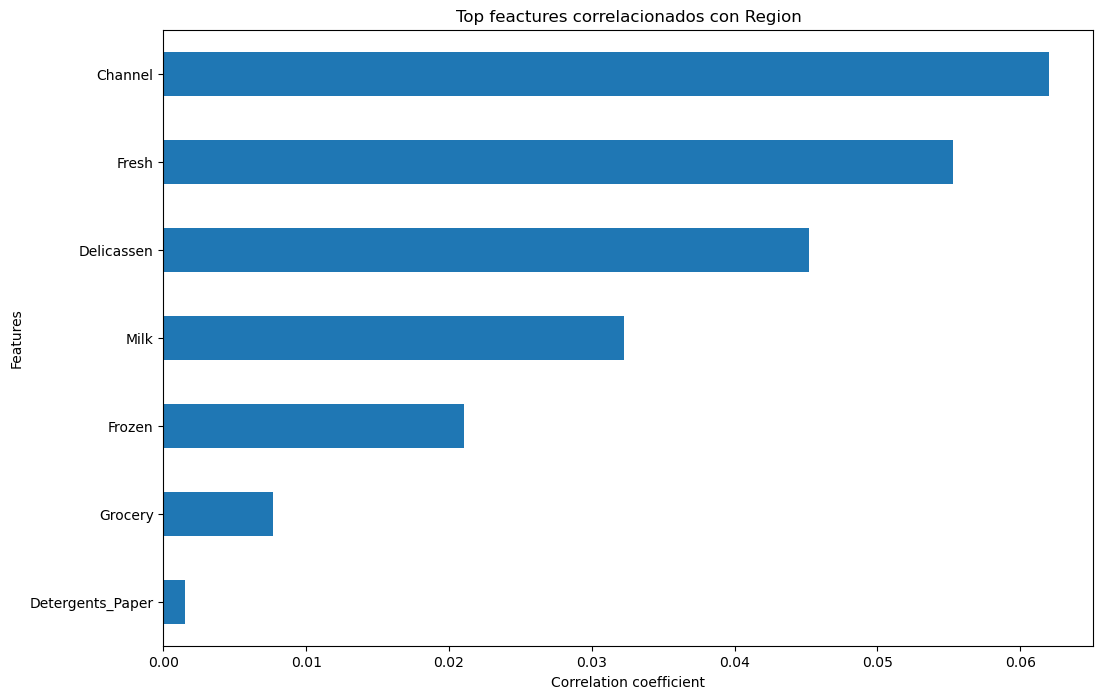

In [17]:
# Crear un top 5 de las correlaciones mas altas en base a nuestra variable objetivo y las graficamos
plt.figure(figsize=(12, 8))
data.corr().Region.apply(lambda x: abs(x)).sort_values(ascending=False).iloc[1:11][::-1].plot(kind='barh') 
plt.title("Top feactures correlacionados con Region")
plt.xlabel("Correlation coefficient")
plt.ylabel("Features")

### **Preprocesamiento**